# Case Study: Analyze the impact of gender on police behavior

You will explore the **Stanford Open Policing Project** dataset and analyze the impact of gender on police behavior. In the notebook, you will gain more practice cleaning messy data, creating visualizations, combining and reshaping datasets, and manipulating time series data. Analyzing Police Activity with pandas will give you valuable experience analyzing a dataset from start to finish.

## Examining the dataset

Throughout this notebook, you'll be analyzing a dataset of traffic stops in Rhode Island that was collected by the [Stanford Open Policing Project](https://openpolicing.stanford.edu/).

Before beginning your analysis, it's important that you familiarize yourself with the dataset. In this exercise, you'll read the dataset into pandas, examine the first few rows, and then count the number of missing values.

In [28]:
# Import the pandas library as pd
import pandas as pd

# Read 'police.csv' into a DataFrame named ri
ri = pd.read_csv('data/dc11/police.csv')

In [29]:
# Examine the head of the DataFrame
ri.head()

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


In [30]:
# Count the number of missing values in each column
ri.isnull().sum()

state                     0
stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64

It looks like most of the columns have at least some missing values.

## Dropping columns

Often, a DataFrame will contain columns that are not useful to your analysis. Such columns should be dropped from the DataFrame, to make it easier for you to focus on the remaining columns.

In this exercise, you'll drop the `county_name` column because it only contains missing values, and you'll drop the `state` column because all of the traffic stops took place in one state (Rhode Island). Thus, these columns can be dropped because they contain no useful information.

In [31]:
# Examine the shape of the DataFrame
ri.shape

(91741, 15)

In [32]:
# Drop the 'county_name' and 'state' columns
ri.drop(['county_name', 'state'], axis='columns', inplace=True)

In [33]:
# Examine the shape of the DataFrame (again)
ri.shape

(91741, 13)

## Dropping rows

When you know that a specific column will be critical to your analysis, and only a small fraction of rows are missing a value in that column, it often makes sense to remove those rows from the dataset.

The `driver_gender` column will be critical to many of your analyses. Because only a small fraction of rows are missing `driver_gender`, we'll drop those rows from the dataset.

In [34]:
# Drop all rows that are missing 'driver_gender'
ri.dropna(subset=['driver_gender'], inplace=True)

In [35]:
ri.shape

(86536, 13)

In [36]:
ri.isnull().sum()

stop_date                 0
stop_time                 0
driver_gender             0
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
search_type           83229
stop_outcome              0
is_arrested               0
stop_duration             0
drugs_related_stop        0
district                  0
dtype: int64

We dropped around 5,000 rows, which is a small fraction of the dataset, and now only one column remains with any missing values.

## Finding an incorrect data type

The `dtypes` attribute of the `ri` DataFrame has been printed for you. Your task is to explore the `ri` DataFrame in the IPython Shell to determine which column's data type should be changed.

<img src="images/data_types_importance.png" alt="" style="width: 400px;"/> 


In [37]:
ri.dtypes

stop_date             object
stop_time             object
driver_gender         object
driver_race           object
violation_raw         object
violation             object
search_conducted        bool
search_type           object
stop_outcome          object
is_arrested           object
stop_duration         object
drugs_related_stop      bool
district              object
dtype: object

## Fixing a data type

We saw in the previous exercise that the `is_arrested` column currently has the object data type. In this exercise, we'll change the data type to `bool`, which is the most suitable type for a column containing True and False values.

Fixing the data type will enable us to use mathematical operations on the `is_arrested` column that would not be possible otherwise.

In [38]:
# Examine the head of the 'is_arrested' column
ri.is_arrested.head()

0    False
1    False
2    False
3     True
4    False
Name: is_arrested, dtype: object

In [39]:
# Check the data type of 'is_arrested'
ri.is_arrested.dtype

dtype('O')

In [40]:
# Change the data type of 'is_arrested' to 'bool'
ri['is_arrested'] = ri.is_arrested.astype('bool')

In [41]:
# Check the data type of 'is_arrested' (again)
ri.is_arrested.dtype

dtype('bool')

## Combining object columns

Currently, the date and time of each traffic stop are stored in separate object columns: `stop_date` and `stop_time`.

In this exercise, you'll combine these two columns into a single column, and then convert it to `datetime` format. This will enable convenient date-based attributes that we'll use later.

In [42]:
# Concatenate 'stop_date' and 'stop_time' (separated by a space)
combined = ri.stop_date.str.cat(ri.stop_time, sep=' ')
combined.head()

0    2005-01-04 12:55
1    2005-01-23 23:15
2    2005-02-17 04:15
3    2005-02-20 17:15
4    2005-02-24 01:20
Name: stop_date, dtype: object

In [43]:
# Convert 'combined' to datetime format
ri['stop_datetime'] = pd.to_datetime(combined)

In [44]:
ri.dtypes

stop_date                     object
stop_time                     object
driver_gender                 object
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                     bool
stop_duration                 object
drugs_related_stop              bool
district                      object
stop_datetime         datetime64[ns]
dtype: object

## Setting the index

The last step is to set the `stop_datetime` column as the DataFrame's `index`. By replacing the default index with a `DatetimeIndex`, you'll make it easier to analyze the dataset by date and time, which will come in handy later!

In [45]:
# Set 'stop_datetime' as the index
ri.set_index('stop_datetime', inplace=True)

In [46]:
ri.index

DatetimeIndex(['2005-01-04 12:55:00', '2005-01-23 23:15:00',
               '2005-02-17 04:15:00', '2005-02-20 17:15:00',
               '2005-02-24 01:20:00', '2005-03-14 10:00:00',
               '2005-03-29 21:55:00', '2005-04-04 21:25:00',
               '2005-07-14 11:20:00', '2005-07-14 19:55:00',
               ...
               '2015-12-31 13:23:00', '2015-12-31 18:59:00',
               '2015-12-31 19:13:00', '2015-12-31 20:20:00',
               '2015-12-31 20:50:00', '2015-12-31 21:21:00',
               '2015-12-31 21:59:00', '2015-12-31 22:04:00',
               '2015-12-31 22:09:00', '2015-12-31 22:47:00'],
              dtype='datetime64[ns]', name='stop_datetime', length=86536, freq=None)

In [48]:
# Examine the columns
# Examine the DataFrame columns to confirm that stop_datetime 
#  is no longer one of the columns.
'stop_datetime' in ri.columns

False

# Do the genders commit different violations?

## Examining traffic violations

Before comparing the violations being committed by each gender, you should examine the violations committed by all drivers to get a baseline understanding of the data.

In this exercise, you'll count the unique values in the `violation` column, and then separately express those counts as proportions.

In [49]:
# Count the unique values in 'violation'
print(ri.violation.value_counts())

Speeding               48423
Moving violation       16224
Equipment              10921
Other                   4409
Registration/plates     3703
Seat belt               2856
Name: violation, dtype: int64


In [50]:
# Express the counts as proportions
print(ri.violation.value_counts(normalize=True))

Speeding               0.559571
Moving violation       0.187483
Equipment              0.126202
Other                  0.050950
Registration/plates    0.042791
Seat belt              0.033004
Name: violation, dtype: float64


More than half of all violations are for speeding, followed by other moving violations and equipment violations.

## Comparing violations by gender

The question we're trying to answer is whether male and female drivers tend to commit different types of traffic violations.

In this exercise, you'll first create a DataFrame for each gender, and then analyze the violations in each DataFrame separately.

In [51]:
# Create a DataFrame of female drivers
female = ri[ri.driver_gender == 'F']
female.head()

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,
2005-02-24 01:20:00,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3
2005-03-14 10:00:00,2005-03-14,10:00,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2005-07-14 11:20:00,2005-07-14,11:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-07-18 19:30:00,2005-07-18,19:30,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2005-07-24 20:10:00,2005-07-24,20:10,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3


In [52]:
# Create a DataFrame of male drivers
male = ri[ri.driver_gender == 'M']
male.head()

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,
2005-01-04 12:55:00,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-01-23 23:15:00,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2005-02-17 04:15:00,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-02-20 17:15:00,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
2005-03-29 21:55:00,2005-03-29,21:55,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3


In [53]:
# Compute the violations by female drivers (as proportions)
print(female.violation.value_counts(normalize=True))

Speeding               0.658114
Moving violation       0.138218
Equipment              0.105199
Registration/plates    0.044418
Other                  0.029738
Seat belt              0.024312
Name: violation, dtype: float64


In [54]:
# Compute the violations by male drivers (as proportions)
print(male.violation.value_counts(normalize=True))

Speeding               0.522243
Moving violation       0.206144
Equipment              0.134158
Other                  0.058985
Registration/plates    0.042175
Seat belt              0.036296
Name: violation, dtype: float64


About two-thirds of female traffic stops are for speeding, whereas stops of males are more balanced among the six categories. This doesn't mean that females speed more often than males, however, since we didn't take into account the number of stops or drivers.

# Does gender affect who gets a ticket for speeding?

## Filtering by multiple conditions

Which one of these commands would filter the ri DataFrame to only include female drivers who were stopped for a speeding violation?

`ri[(ri.driver_gender == 'F') & (ri.violation == 'Speeding')]`

## Comparing speeding outcomes by gender

When a driver is pulled over for speeding, many people believe that gender has an impact on whether the driver will receive a ticket or a warning. Can you find evidence of this in the dataset?

First, you'll create two DataFrames of drivers who were stopped for speeding: one containing females and the other containing males.

Then, for each gender, you'll use the `stop_outcome` column to calculate what percentage of stops resulted in a "Citation" (meaning a ticket) versus a "Warning".

In [55]:
# Create a DataFrame of female drivers stopped for speeding
female_and_speeding = ri[(ri.driver_gender == 'F') & (ri.violation == 'Speeding')]

In [56]:
# Create a DataFrame of male drivers stopped for speeding
male_and_speeding = ri[(ri.driver_gender == 'M') & (ri.violation == 'Speeding')]

In [57]:
# Compute the stop outcomes for female drivers (as proportions)
print(female_and_speeding.stop_outcome.value_counts(normalize=True))

Citation            0.952192
Warning             0.040074
Arrest Driver       0.005752
N/D                 0.000959
Arrest Passenger    0.000639
No Action           0.000383
Name: stop_outcome, dtype: float64


In [58]:
# Compute the stop outcomes for male drivers (as proportions)
print(male_and_speeding.stop_outcome.value_counts(normalize=True))

Citation            0.944595
Warning             0.036184
Arrest Driver       0.015895
Arrest Passenger    0.001281
No Action           0.001068
N/D                 0.000976
Name: stop_outcome, dtype: float64


The numbers are similar for males and females: about 95% of stops for speeding result in a ticket. Thus, the data fails to show that gender has an impact on who gets a ticket for speeding.

# Does gender affect whose vehicle is searched?

## Calculating the search rate

During a traffic stop, the police officer sometimes conducts a search of the vehicle. In this exercise, you'll calculate the percentage of all stops that result in a vehicle search, also known as the search rate.

In [59]:
# Check the data type of 'search_conducted'
ri.search_conducted.dtype

dtype('bool')

In [60]:
# Calculate the search rate by counting the values
ri.search_conducted.value_counts(normalize=True)

False    0.961785
True     0.038215
Name: search_conducted, dtype: float64

In [61]:
# Calculate the search rate by taking the mean
ri.search_conducted.mean()

0.0382153092354627

It looks like the search rate is about 3.8%. Next, you'll examine whether the search rate varies by driver gender.

## Comparing search rates by gender

In this exercise, you'll compare the rates at which female and male drivers are searched during a traffic stop. Remember that the vehicle search rate across all stops is about 3.8%.

First, you'll filter the DataFrame by `gender` and calculate the search rate for each group separately. Then, you'll perform the same calculation for both genders at once using a `.groupby()`.

In [62]:
# Calculate the search rate for female drivers
print(ri[ri.driver_gender == 'F'].search_conducted.mean())

0.019180617481282074


In [63]:
# Calculate the search rate for male drivers
print(ri[ri.driver_gender == 'M'].search_conducted.mean())

0.04542557598546892


In [64]:
# Calculate the search rate for both groups simultaneously
print(ri.groupby(ri.driver_gender).search_conducted.mean())

driver_gender
F    0.019181
M    0.045426
Name: search_conducted, dtype: float64


Male drivers are searched more than twice as often as female drivers. Why might this be?

## Adding a second factor to the analysis

Even though the search rate for males is much higher than for females, it's possible that the difference is mostly due to a second factor.

For example, you might hypothesize that the search rate varies by violation type, and the difference in search rate between males and females is because they tend to commit different violations.

You can test this hypothesis by examining the search rate for each combination of gender and violation. If the hypothesis was true, you would find that males and females are searched at about the same rate for each violation. Find out below if that's the case!

In [65]:
# Calculate the search rate for each combination of gender and violation
ri.groupby(['driver_gender', 'violation']).search_conducted.mean()

driver_gender  violation          
F              Equipment              0.039984
               Moving violation       0.039257
               Other                  0.041018
               Registration/plates    0.054924
               Seat belt              0.017301
               Speeding               0.008309
M              Equipment              0.071496
               Moving violation       0.061524
               Other                  0.046191
               Registration/plates    0.108802
               Seat belt              0.035119
               Speeding               0.027885
Name: search_conducted, dtype: float64

In [66]:
# Reverse the ordering to group by violation before gender
ri.groupby(['violation', 'driver_gender']).search_conducted.mean()

violation            driver_gender
Equipment            F                0.039984
                     M                0.071496
Moving violation     F                0.039257
                     M                0.061524
Other                F                0.041018
                     M                0.046191
Registration/plates  F                0.054924
                     M                0.108802
Seat belt            F                0.017301
                     M                0.035119
Speeding             F                0.008309
                     M                0.027885
Name: search_conducted, dtype: float64

For all types of violations, the search rate is higher for males than for females, disproving our hypothesis.

# Does gender affect who is frisked during a search?

## Counting protective frisks

During a vehicle search, the police officer may pat down the driver to check if they have a weapon. This is known as a "protective frisk."

In this exercise, you'll first check to see how many times "Protective Frisk" was the only search type. Then, you'll use a string method to locate all instances in which the driver was frisked.

In [67]:
# Count the 'search_type' values
ri.search_type.value_counts()

Incident to Arrest                                          1290
Probable Cause                                               924
Inventory                                                    219
Reasonable Suspicion                                         214
Protective Frisk                                             164
Incident to Arrest,Inventory                                 123
Incident to Arrest,Probable Cause                            100
Probable Cause,Reasonable Suspicion                           54
Probable Cause,Protective Frisk                               35
Incident to Arrest,Inventory,Probable Cause                   35
Incident to Arrest,Protective Frisk                           33
Inventory,Probable Cause                                      25
Protective Frisk,Reasonable Suspicion                         19
Incident to Arrest,Inventory,Protective Frisk                 18
Incident to Arrest,Probable Cause,Protective Frisk            13
Inventory,Protective Fris

In [68]:
# Check if 'search_type' contains the string 'Protective Frisk'
# Create a new column, frisk, that is True if search_type contains 
#  the string "Protective Frisk" and False otherwise.
ri['frisk'] = ri.search_type.str.contains('Protective Frisk', na=False)

In [69]:
# Check the data type of 'frisk'
ri.frisk.dtype

dtype('bool')

In [70]:
# Take the sum of 'frisk'
ri.frisk.sum()

303

It looks like there were 303 drivers who were frisked. Next, you'll examine whether gender affects who is frisked.

## Comparing frisk rates by gender

In this exercise, you'll compare the rates at which female and male drivers are frisked during a search. Are males frisked more often than females, perhaps because police officers consider them to be higher risk?

Before doing any calculations, it's important to filter the DataFrame to only include the relevant subset of data, namely stops in which a search was conducted.

In [71]:
# Create a DataFrame of stops in which a search was conducted
searched = ri[ri.search_conducted == True]

In [72]:
# Calculate the overall frisk rate by taking the mean of 'frisk'
searched.frisk.mean()

0.09162382824312065

In [73]:
searched.groupby('driver_gender').frisk.mean()

driver_gender
F    0.074561
M    0.094353
Name: frisk, dtype: float64

The frisk rate is higher for males than for females, though we can't conclude that this difference is caused by the driver's gender.

# Does time of day affect arrest rate?

## Calculating the hourly arrest rate

When a police officer stops a driver, a small percentage of those stops ends in an arrest. This is known as the arrest rate. In this exercise, you'll find out whether the arrest rate varies by time of day.

First, you'll calculate the arrest rate across all stops. Then, you'll calculate the hourly arrest rate by using the hour attribute of the index. The hour ranges from 0 to 23, in which:

- 0 = midnight
- 12 = noon
- 23 = 11 PM

In [74]:
# Calculate the overall arrest rate
ri.is_arrested.mean()

0.0355690117407784

In [75]:
# Calculate the hourly arrest rate
print(ri.groupby(ri.index.hour).is_arrested.mean())

stop_datetime
0     0.051431
1     0.064932
2     0.060798
3     0.060549
4     0.048000
5     0.042781
6     0.013813
7     0.013032
8     0.021854
9     0.025206
10    0.028213
11    0.028897
12    0.037399
13    0.030776
14    0.030605
15    0.030679
16    0.035281
17    0.040619
18    0.038204
19    0.032245
20    0.038107
21    0.064541
22    0.048666
23    0.047592
Name: is_arrested, dtype: float64


In [76]:
# Save the hourly arrest rate
hourly_arrest_rate = ri.groupby(ri.index.hour).is_arrested.mean()

## Plotting the hourly arrest rate

In this exercise, you'll create a line plot from the `hourly_arrest_rate` object. A line plot is appropriate in this case because you're showing how a quantity changes over time.

This plot should help you to spot some trends that may not have been obvious when examining the raw numbers!

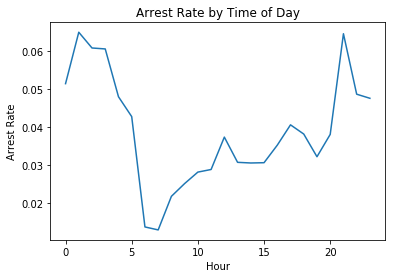

In [77]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline

# Create a line plot of 'hourly_arrest_rate'
hourly_arrest_rate.plot()

# Add the xlabel, ylabel, and title
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')

# Display the plot
plt.show();

# Are drug-related stops on the rise?

## Plotting drug-related stops

In a small portion of traffic stops, drugs are found in the vehicle during a search. In this exercise, you'll assess whether these drug-related stops are becoming more common over time.

The Boolean column `drugs_related_stop` indicates whether drugs were found during a given stop. You'll calculate the annual drug rate by resampling this column, and then you'll use a line plot to visualize how the rate has changed over time.

stop_datetime
2005-12-31    0.006501
2006-12-31    0.007258
2007-12-31    0.007970
2008-12-31    0.007505
2009-12-31    0.009889
2010-12-31    0.010081
2011-12-31    0.009731
2012-12-31    0.009921
2013-12-31    0.013094
2014-12-31    0.013826
2015-12-31    0.012266
Freq: A-DEC, Name: drugs_related_stop, dtype: float64


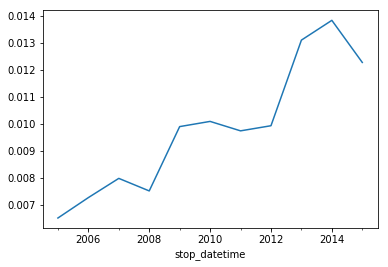

In [78]:
# Calculate the annual rate of drug-related stops
print(ri.drugs_related_stop.resample('A').mean())

# Save the annual rate of drug-related stops
annual_drug_rate = ri.drugs_related_stop.resample('A').mean()

# Create a line plot of 'annual_drug_rate'
annual_drug_rate.plot()

# Display the plot
plt.show()

The rate of drug-related stops nearly doubled over the course of 10 years. Why might that be the case?

## Comparing drug and search rates

As you saw in the last exercise, the rate of drug-related stops increased significantly between 2005 and 2015. You might hypothesize that the rate of vehicle searches was also increasing, which would have led to an increase in drug-related stops even if more drivers were not carrying drugs.

You can test this hypothesis by calculating the annual search rate, and then plotting it against the annual drug rate. If the hypothesis is true, then you'll see both rates increasing over time.

In [79]:
# Calculate and save the annual search rate
annual_search_rate = ri.search_conducted.resample('A').mean()
annual_search_rate

stop_datetime
2005-12-31    0.049167
2006-12-31    0.041758
2007-12-31    0.044056
2008-12-31    0.040310
2009-12-31    0.049861
2010-12-31    0.044805
2011-12-31    0.035682
2012-12-31    0.033616
2013-12-31    0.030022
2014-12-31    0.031801
2015-12-31    0.028497
Freq: A-DEC, Name: search_conducted, dtype: float64

In [80]:
# Concatenate 'annual_drug_rate' and 'annual_search_rate'
annual = pd.concat([annual_drug_rate, annual_search_rate], axis='columns')
annual

,drugs_related_stop,search_conducted
stop_datetime,,
2005-12-31,0.006501,0.049167
2006-12-31,0.007258,0.041758
2007-12-31,0.007970,0.044056
2008-12-31,0.007505,0.040310
2009-12-31,0.009889,0.049861
2010-12-31,0.010081,0.044805
2011-12-31,0.009731,0.035682
2012-12-31,0.009921,0.033616
2013-12-31,0.013094,0.030022


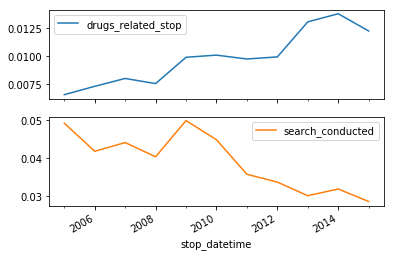

In [81]:
# Create subplots from 'annual'
annual.plot(subplots=True)

# Display the subplots
plt.show();

The rate of drug-related stops increased even though the search rate decreased, disproving our hypothesis.

# What violations are caught in each district?

## Tallying violations by district

The state of Rhode Island is broken into six police districts, also known as `zones`. How do the zones compare in terms of what violations are caught by police?

In this exercise, you'll create a **frequency table** to determine how many violations of each type took place in each of the six zones. Then, you'll filter the table to focus on the "K" zones, which you'll examine further in the next exercise.

In [85]:
# Create a frequency table of districts and violations
pd.crosstab(ri.district, ri.violation)

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,672,1254,290,120,0,5960
Zone K2,2061,2962,942,768,481,10448
Zone K3,2302,2898,705,695,638,12322
Zone X1,296,671,143,38,74,1119
Zone X3,2049,3086,769,671,820,8779
Zone X4,3541,5353,1560,1411,843,9795


In [86]:
# Save the frequency table as 'all_zones'
all_zones = pd.crosstab(ri.district, ri.violation)

In [88]:
# Select rows 'Zone K1' through 'Zone K3'
all_zones.loc['Zone K1':'Zone K3']

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,672,1254,290,120,0,5960
Zone K2,2061,2962,942,768,481,10448
Zone K3,2302,2898,705,695,638,12322


In [89]:
# Save the smaller table as 'k_zones'
k_zones = all_zones.loc['Zone K1':'Zone K3']

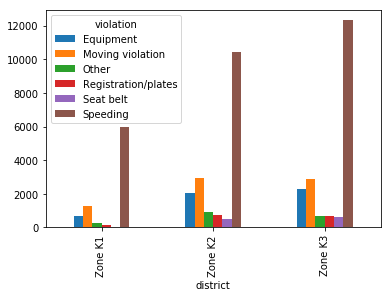

In [90]:
# Create a bar plot of 'k_zones'
k_zones.plot(kind='bar')

# Display the plot
plt.show();

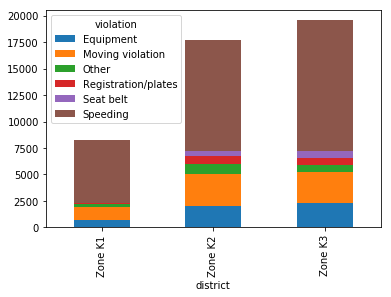

In [91]:
# Create a stacked bar plot of 'k_zones'
k_zones.plot(kind='bar', stacked=True)

# Display the plot
plt.show();

The vast majority of traffic stops in Zone K1 are for speeding, and Zones K2 and K3 are remarkably similar to one another in terms of violations.

# How long might you be stopped for a violation?

## Converting stop durations to numbers

In the traffic stops dataset, the `stop_duration` column tells you approximately how long the driver was detained by the officer. Unfortunately, the durations are stored as strings, such as '0-15 Min'. How can you make this data easier to analyze?

In this exercise, you'll convert the stop durations to integers. Because the precise durations are not available, you'll have to estimate the numbers using reasonable values:

- Convert '0-15 Min' to 8
- Convert '16-30 Min' to 23
- Convert '30+ Min' to 45

In [92]:
# Print the unique values in 'stop_duration'
ri.stop_duration.unique()

array(['0-15 Min', '16-30 Min', '30+ Min'], dtype=object)

In [93]:
# Create a dictionary that maps strings to integers
mapping = {'0-15 Min':8, '16-30 Min':23, '30+ Min':45}

In [94]:
# Convert the 'stop_duration' strings to integers using the 'mapping'
ri['stop_minutes'] = ri.stop_duration.map(mapping)

In [95]:
# Print the unique values in 'stop_minutes'
ri.stop_minutes.unique()

array([ 8, 23, 45])

## Plotting stop length

If you were stopped for a particular violation, how long might you expect to be detained?

In this exercise, you'll visualize the average length of time drivers are stopped for each type of violation. Rather than using the `violation` column in this exercise, you'll use `violation_raw` since it contains more detailed descriptions of the violations.

In [97]:
# Calculate the mean 'stop_minutes' for each value in 'violation_raw'
ri.groupby('violation_raw').stop_minutes.mean()

violation_raw
APB                                 17.967033
Call for Service                    22.124371
Equipment/Inspection Violation      11.445655
Motorist Assist/Courtesy            17.741463
Other Traffic Violation             13.844490
Registration Violation              13.736970
Seatbelt Violation                   9.662815
Special Detail/Directed Patrol      15.123632
Speeding                            10.581562
Suspicious Person                   14.910714
Violation of City/Town Ordinance    13.254144
Warrant                             24.055556
Name: stop_minutes, dtype: float64

In [98]:
# Save the resulting Series as 'stop_length'
stop_length = ri.groupby('violation_raw').stop_minutes.mean()

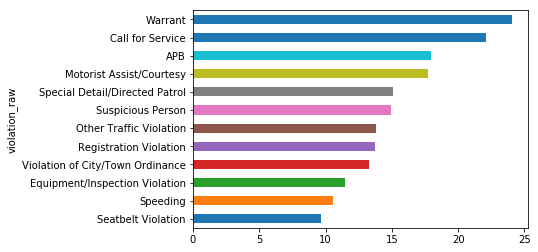

In [102]:
# Sort 'stop_length' by its values and create a horizontal bar plot
stop_length.sort_values().plot(kind='barh');

In [101]:
# Display the plot
plt.show();

# Exploring the weather dataset

## Plotting the temperature

In this exercise, you'll examine the temperature columns from the weather dataset to assess whether the data seems trustworthy. First you'll print the summary statistics, and then you'll visualize the data using a box plot.

When deciding whether the values seem reasonable, keep in mind that the temperature is measured in degrees Fahrenheit, not Celsius!

In [105]:
# Read 'weather.csv' into a DataFrame named 'weather'
weather = pd.read_csv('data/dc11/weather.csv')

In [106]:
# Describe the temperature columns
weather[['TMIN', 'TAVG', 'TMAX']].describe()

,TMIN,TAVG,TMAX
count,4017.000000,1217.000000,4017.000000
mean,43.484441,52.493016,61.268608
std,17.020298,17.830714,18.199517
min,-5.000000,6.000000,15.000000
25%,30.000000,39.000000,47.000000
50%,44.000000,54.000000,62.000000
75%,58.000000,68.000000,77.000000
max,77.000000,86.000000,102.000000


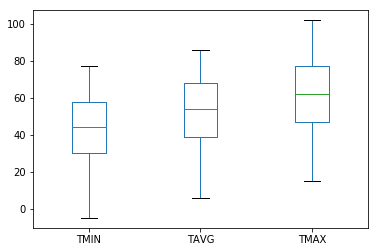

In [107]:
# Create a box plot of the temperature columns
weather[['TMIN', 'TAVG', 'TMAX']].plot(kind='box')

# Display the plot
plt.show();

The temperature data looks good so far: the TAVG values are in between TMIN and TMAX, and the measurements and ranges seem reasonable.

## Plotting the temperature difference

In this exercise, you'll continue to assess whether the dataset seems trustworthy by plotting the difference between the maximum and minimum temperatures.

What do you notice about the resulting histogram? Does it match your expectations, or do you see anything unusual?

In [108]:
# Create a 'TDIFF' column that represents temperature difference
weather['TDIFF'] = weather['TMAX'] - weather['TMIN']

In [109]:
# Describe the 'TDIFF' column
weather['TDIFF'].describe()

count    4017.000000
mean       17.784167
std         6.350720
min         2.000000
25%        14.000000
50%        18.000000
75%        22.000000
max        43.000000
Name: TDIFF, dtype: float64

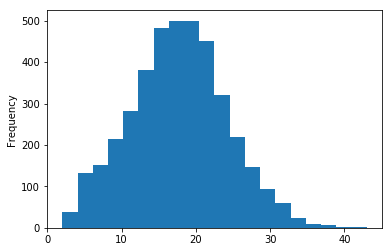

In [110]:
# Create a histogram with 20 bins to visualize 'TDIFF'
weather['TDIFF'].plot(kind='hist', bins=20)

# Display the plot
plt.show();

The TDIFF column has no negative values and its distribution is approximately normal, both of which are signs that the data is trustworthy.

# Categorizing the weather

## Counting bad weather conditions

The `weather` DataFrame contains 20 columns that start with 'WT', each of which represents a bad weather condition. For example:

- WT05 indicates "Hail"
- WT11 indicates "High or damaging winds"
- WT17 indicates "Freezing rain"

For every row in the dataset, each `WT` column contains either a 1 (meaning the condition was present that day) or NaN (meaning the condition was not present).

In this exercise, you'll quantify "how bad" the weather was each day by counting the number of 1 values in each row.

In [112]:
# Copy 'WT01' through 'WT22' to a new DataFrame
WT = weather.loc[:, 'WT01':'WT22']

In [116]:
# Calculate the sum of each row in 'WT'
weather['bad_conditions'] = WT.sum(axis='columns')
weather['bad_conditions'][:10]

0    2.0
1    2.0
2    3.0
3    4.0
4    4.0
5    9.0
6    2.0
7    6.0
8    3.0
9    3.0
Name: bad_conditions, dtype: float64

In [118]:
# Replace missing values in 'bad_conditions' with '0'
weather['bad_conditions'] = weather.bad_conditions.fillna(0).astype('int')

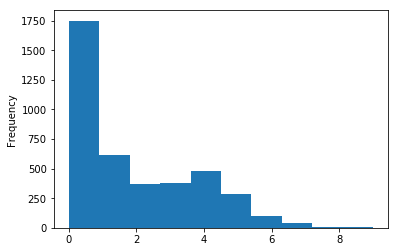

In [120]:
# Create a histogram to visualize 'bad_conditions'
weather.bad_conditions.plot(kind='hist')

# Display the plot
plt.show();

It looks like many days didn't have any bad weather conditions, and only a small portion of days had more than four bad weather conditions.

## Rating the weather conditions

In the previous exercise, you counted the number of bad weather conditions each day. In this exercise, you'll use the counts to create a rating system for the weather.

The counts range from 0 to 9, and should be converted to ratings as follows:

- Convert 0 to 'good'
- Convert 1 through 4 to 'bad'
- Convert 5 through 9 to 'worse'

In [121]:
# Count the unique values in 'bad_conditions' and sort the index
weather.bad_conditions.value_counts().sort_index()

0    1749
1     613
2     367
3     380
4     476
5     282
6     101
7      41
8       4
9       4
Name: bad_conditions, dtype: int64

In [122]:
# Create a dictionary that maps integers to strings
mapping = {0:'good', 1:'bad', 2:'bad', 3:'bad', 4:'bad', 5:'worse', 6:'worse', 7:'worse', 8:'worse', 9:'worse'}


In [123]:
# Convert the 'bad_conditions' integers to strings using the 'mapping'
weather['rating'] = weather.bad_conditions.map(mapping)

In [124]:
# Count the unique values in 'rating'
weather.rating.value_counts().sort_index()

bad      1836
good     1749
worse     432
Name: rating, dtype: int64

## Changing the data type to category

Since the `rating` column only has a few possible values, you'll change its data type to category in order to store the data more efficiently. You'll also **specify a logical order for the categories**, which will be useful for future exercises.

In [129]:
# Create a list of weather ratings in logical order
cats = ['good', 'bad', 'worse']

In [130]:
# Change the data type of 'rating' to category
weather['rating'] = weather.rating.astype('category', ordered=True, category=cats)

/Users/ksatola/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  


In [131]:
# Examine the head of 'rating'
weather.rating.head()

0    bad
1    bad
2    bad
3    bad
4    bad
Name: rating, dtype: category
Categories (3, object): [bad < good < worse]

# Merging datasets

## Preparing the DataFrames

In this exercise, you'll prepare the traffic stop and weather rating DataFrames so that they're ready to be merged:

- With the `ri` DataFrame, you'll move the `stop_datetime` index to a column since the index will be lost during the merge.
- With the `weather` DataFrame, you'll select the `DATE` and `rating` columns and put them in a new DataFrame.

In [132]:
# Reset the index of 'ri'
ri.reset_index(inplace=True)

In [133]:
# Examine the head of 'ri'
ri.head()

,stop_datetime,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,frisk,stop_minutes
0,2005-01-04 12:55:00,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,False,8
1,2005-01-23 23:15:00,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,False,8
2,2005-02-17 04:15:00,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4,False,8
3,2005-02-20 17:15:00,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1,False,23
4,2005-02-24 01:20:00,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3,False,8


In [134]:
# Create a DataFrame from the 'DATE' and 'rating' columns
weather_rating = weather[['DATE', 'rating']]

In [135]:
# Examine the head of 'weather_rating'
weather_rating.head()

,DATE,rating
0,2005-01-01,bad
1,2005-01-02,bad
2,2005-01-03,bad
3,2005-01-04,bad
4,2005-01-05,bad


## Merging the DataFrames

In this exercise, you'll merge the `ri` and `weather_rating` DataFrames into a new DataFrame, `ri_weather`.

The DataFrames will be joined using the `stop_date` column from `ri` and the `DATE` column from `weather_rating`. Thankfully the date formatting matches exactly, which is not always the case!

Once the merge is complete, you'll set `stop_datetime` as the index, which is the column you saved in the previous exercise.

In [136]:
# Examine the shape of 'ri'
print(ri.shape)

(86536, 16)


In [137]:
# Merge 'ri' and 'weather_rating' using a left join
ri_weather = pd.merge(left=ri, right=weather_rating, left_on='stop_date', right_on='DATE', how='left')

In [138]:
# Examine the shape of 'ri_weather'
print(ri_weather.shape)

(86536, 18)


In [139]:
# Set 'stop_datetime' as the index of 'ri_weather'
ri_weather.set_index('stop_datetime', inplace=True)

In [140]:
ri_weather.head()

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,frisk,stop_minutes,DATE,rating
stop_datetime,,,,,,,,,,,,,,,,,
2005-01-04 12:55:00,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,False,8,2005-01-04,bad
2005-01-23 23:15:00,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,False,8,2005-01-23,worse
2005-02-17 04:15:00,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4,False,8,2005-02-17,good
2005-02-20 17:15:00,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1,False,23,2005-02-20,bad
2005-02-24 01:20:00,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3,False,8,2005-02-24,bad
